Notebook prepared by ALexander Skakun, Group AJM: Alexander Skakun, Julia Kotovich, Michael Martinson

<a id='Q0'></a>
<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h4 style="color:#303030"> Python for Data Science, Homework, template: </h4> </center>
<center> <h1 style="color:#303030">Assignment W2D2</h1> </center>
<p style="margin-bottom:1cm;"></p>
<center style="color:#303030"><h4>Propulsion Academy, 2021</h4></center>
<p style="margin-bottom:1cm;"></p>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/" title="momentum"> SIT Introduction to Data Science</a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/weeks/week2/day1/index.html" title="momentum">Week 2 Day 1, Applied Machine Learning</a>|
        <a style="color:#00BAE5" href="https://colab.research.google.com/drive/1DK68oHRR2-5IiZ2SG7OTS2cCFSe-RpeE?usp=sharing" title="momentum"> Assignment, Wine Quality Prediction</a>
</strong></nav>

## Copy last session’s Machine Learning notebook, and get help from the tutorials to complete the following tasks:



## Task 2.

Simplify your previous notebook to only keep the train-test split, the auto-sklearn model , evaluation and model explanability.

## Task 3.

Save all ouput figures to images, instead of printing them in the notebook.

## Task 4.



<a id='SU' name="SU"></a>
## [Task 2 and 3](#P0)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import logging
import os

In [2]:
orig_url = "https://drive.google.com/file/d/1AnzuM8RP-A9hQWkBPAqSCeLW7f79dC3N/view" # link goes here
file_id = orig_url.split('/')[-2]
data_path='https://drive.google.com/uc?export=download&id=' + file_id
data = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
TARGET_FEATURE = ['quality']
TRAIN_FEATURES = list(set(df.columns) - set(TARGET_FEATURE))
print(f"Target:\n\t{TARGET_FEATURE}\n\nFeatures:\n\t{TRAIN_FEATURES}")

Target:
	['quality']

Features:
	['density', 'sulphates', 'chlorides', 'residual sugar', 'fixed acidity', 'alcohol', 'pH', 'volatile acidity', 'total sulfur dioxide', 'citric acid', 'free sulfur dioxide']


In [5]:
%cd /content/drive/MyDrive/Introduction2DataScience/w2d2/
LOGGING_LEVEL = logging.INFO
SCRIPT_NAME = 'w2d2_alexander_skakun_assignment'
logging.basicConfig(filename=f'/content/drive/MyDrive/Introduction2DataScience/w2d2/{SCRIPT_NAME}.log', level=LOGGING_LEVEL)

# define useful paths
BASE_PATH = '..'
IMAGE_FOLDER = os.path.join('reports', 'figures')
MODEL_FOLDER = os.path.join('models')

def log(text):
    logging.info(text)

log('Data had been read')

/content/drive/MyDrive/Introduction2DataScience/w2d2


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(df, random_state=42, test_size=0.2)

In [9]:
dup = df.duplicated(keep='first')
log(f"Initial shape of dataset:\n\t{df.shape}")
log(f"count of duplicated rows: {dup.sum()}")

df_new = df[np.logical_not(dup.values)]
train, test = train_test_split(df_new, random_state=42, test_size=0.2)

log(f"train shape:\t{train.shape}\ntest shape:\t{test.shape}")

In [10]:
import seaborn as sns

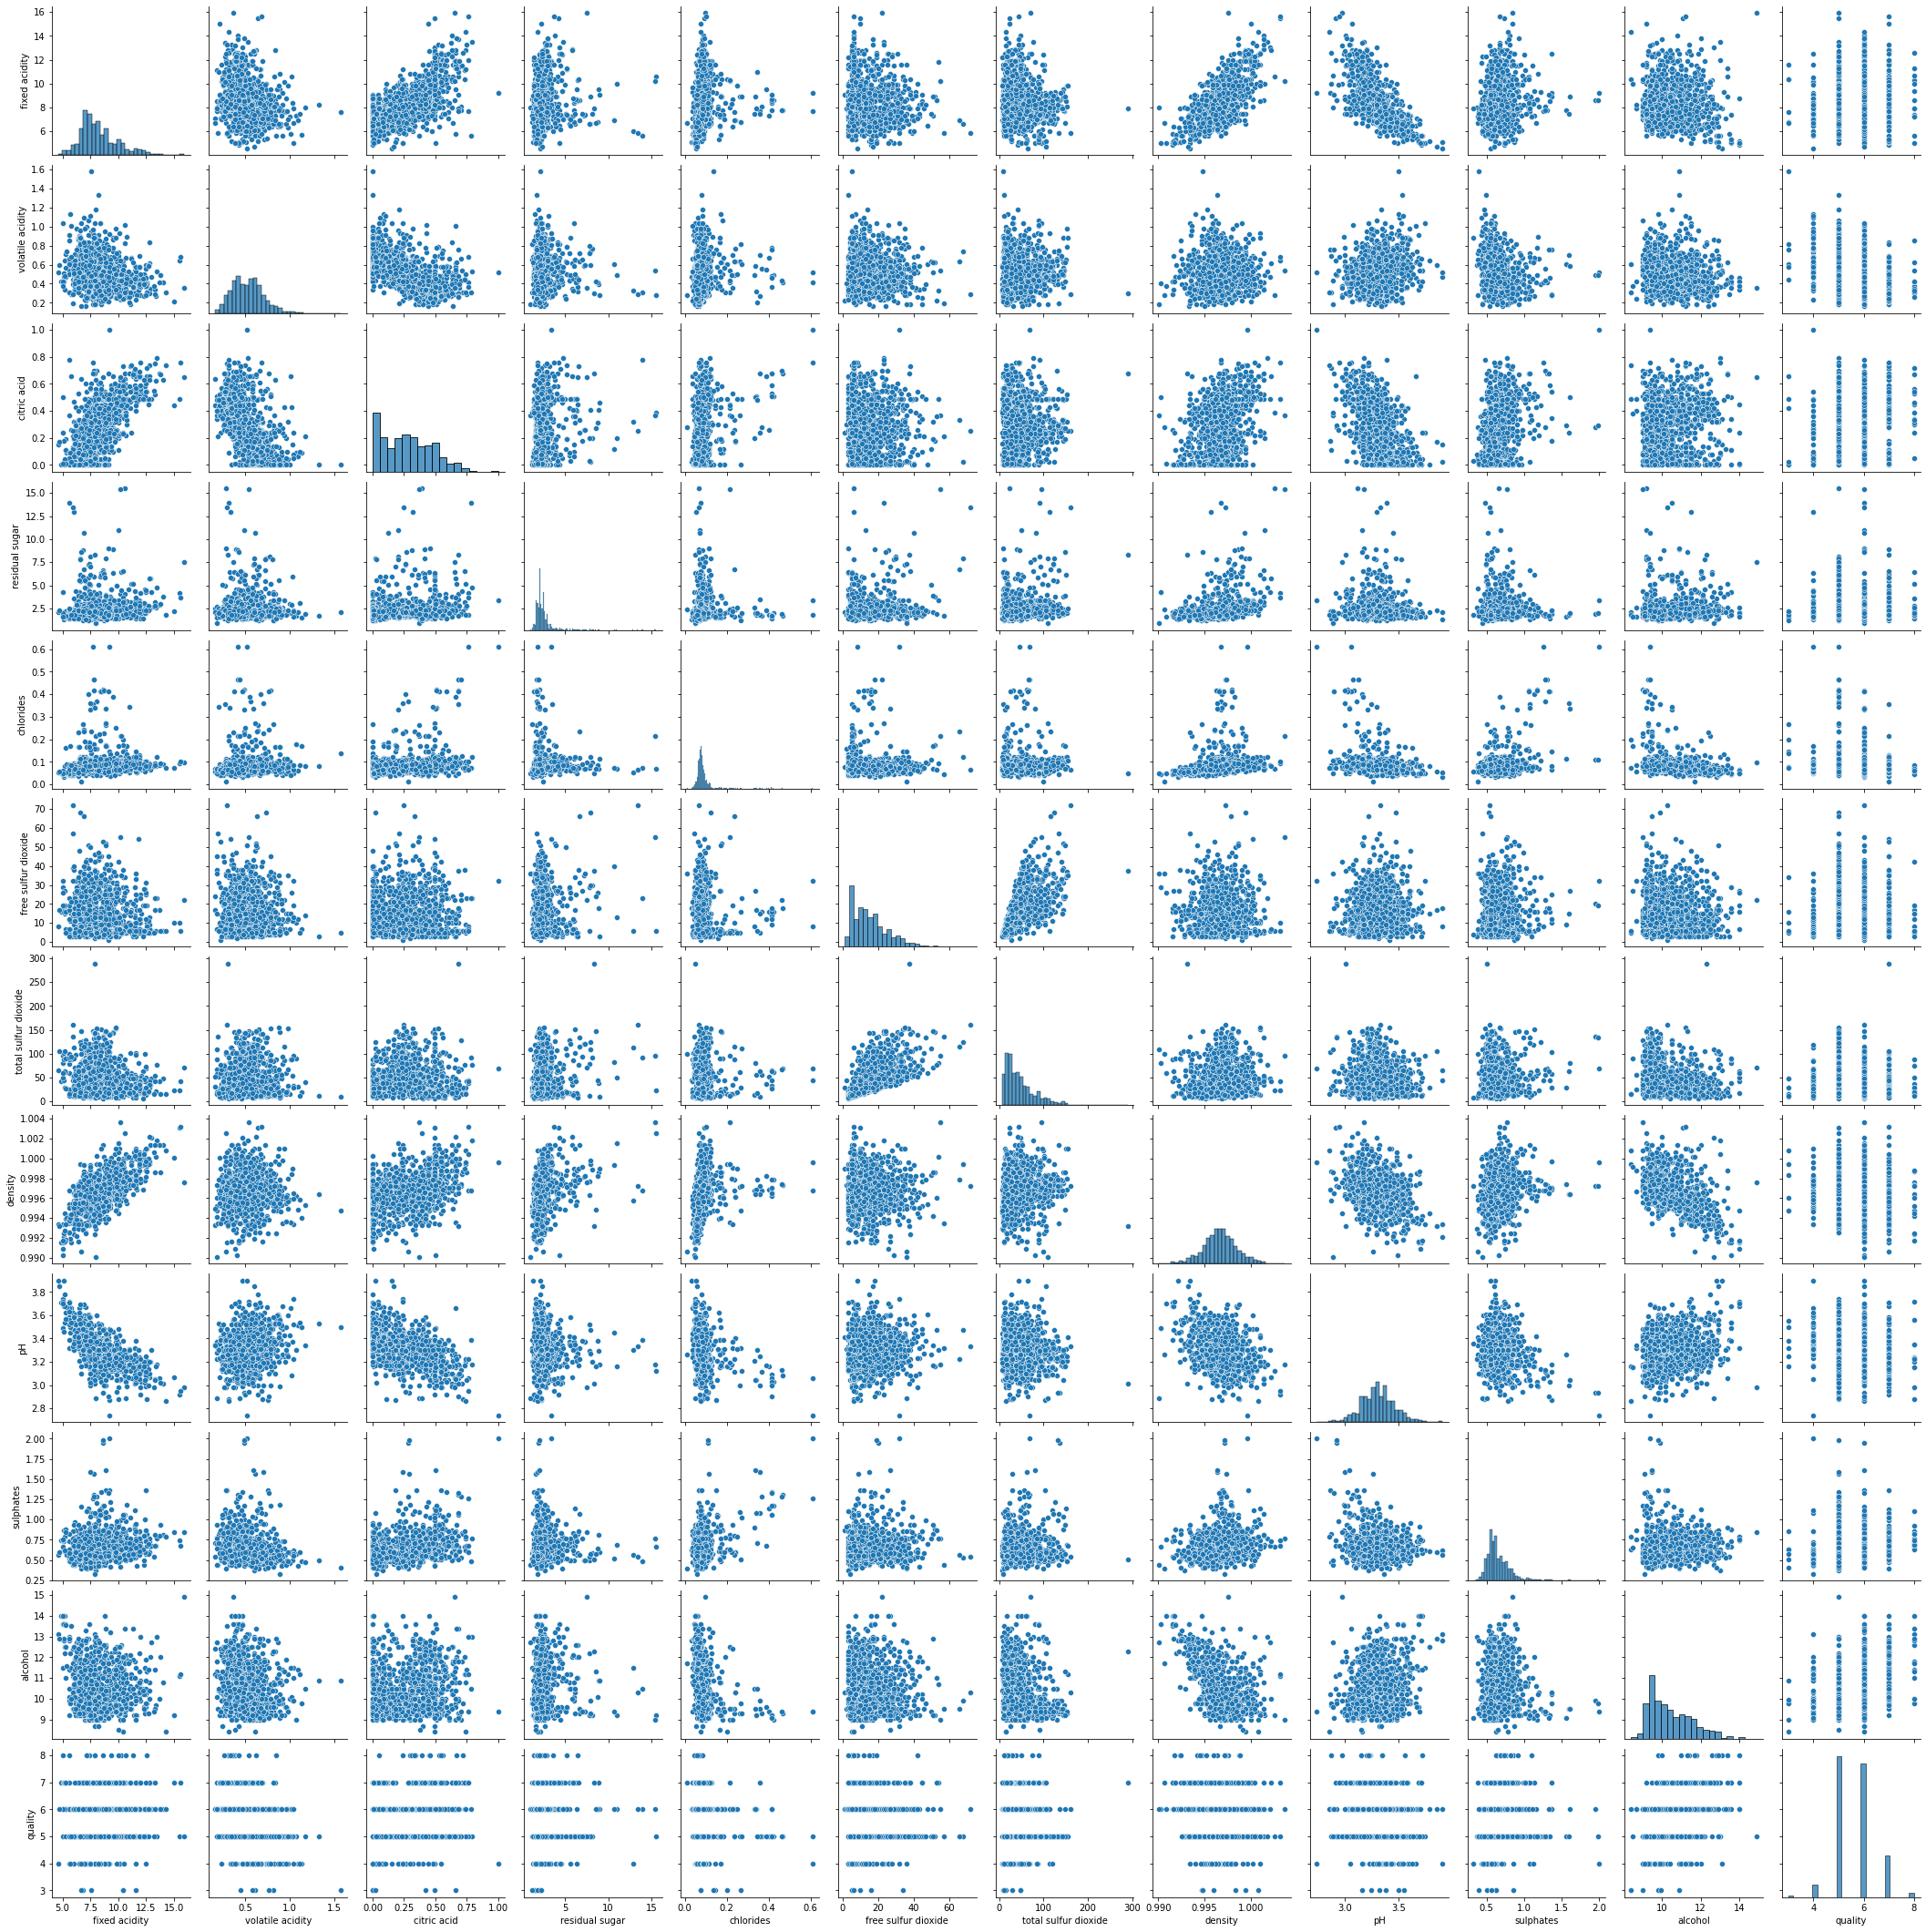

In [17]:
sns.pairplot(train)
plt.savefig(os.path.join(IMAGE_FOLDER, 'pair-plot.png'))

In [ ]:
log('Pair-plot had been saved')

for feature in TRAIN_FEATURES:
    q1 = train[feature].describe().loc['25%']
    q3 = train[feature].describe().loc['75%']
    dist = q3 - q1
    
    temp = np.logical_or(train[feature] > q3 + 1.5 * dist, train[feature] < q1 - 1.5 * dist)
    log(f"{feature} : {temp.sum()}")    

free sulfur dioxide : 20
sulphates : 46
density : 28
pH : 22
alcohol : 11
fixed acidity : 39
citric acid : 1
volatile acidity : 12
chlorides : 75
total sulfur dioxide : 36
residual sugar : 94


Number of features need to be outliers simultaniously: 1
252
Number of features need to be outliers simultaniously: 2
57
Number of features need to be outliers simultaniously: 3
1
Number of features need to be outliers simultaniously: 4
0
Number of features need to be outliers simultaniously: 5
0
Number of features need to be outliers simultaniously: 6
0
Number of features need to be outliers simultaniously: 7
0


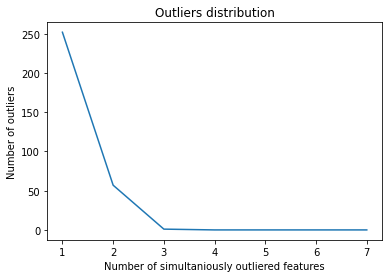

In [23]:

outliers_matrix = np.zeros(len(train), dtype=float)
for i, feature in enumerate(TRAIN_FEATURES):
    q1 = train[feature].describe().loc['25%']
    q3 = train[feature].describe().loc['75%']
    dist = q3 - q1

    outliers_matrix += np.logical_or(train[feature] > q3 + 1.5 * dist, train[feature] < q1 - 1.5 * dist)

n_outliers = []
for n_out_features in range(1, 8):
    print(f'Number of features need to be outliers simultaniously: {n_out_features}')
    n_outliers.append((outliers_matrix>=n_out_features).sum())
    print(n_outliers[-1])

plt.plot( np.arange(1,8), n_outliers)
plt.title('Outliers distribution')
plt.xlabel('Number of simultaniously outliered features')
plt.ylabel('Number of outliers')
plt.savefig(os.path.join(IMAGE_FOLDER, 'outliers_distribution.png'))

In [19]:
log('Outliers defined')
train = train[np.logical_not(outliers_matrix>=3)]
log(f'New train set shape is {train.shape}')

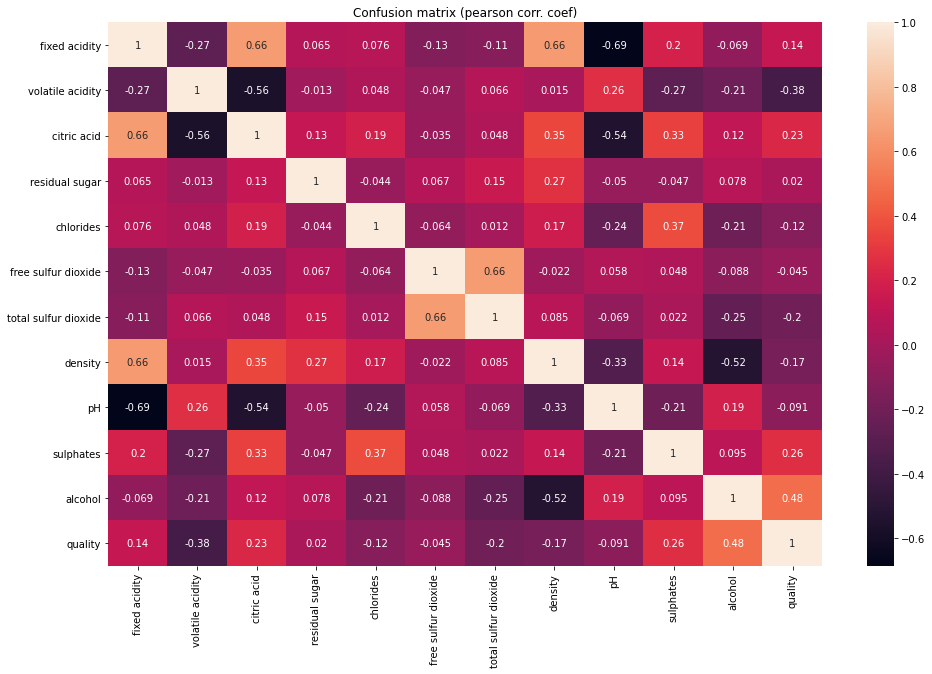

In [22]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    train.corr(),
    xticklabels=df.columns,
    yticklabels=df.columns,
    annot=True
)
plt.title('Confusion matrix (pearson corr. coef)')
plt.savefig(os.path.join(IMAGE_FOLDER, 'confusion_matrix_pearson.png'))

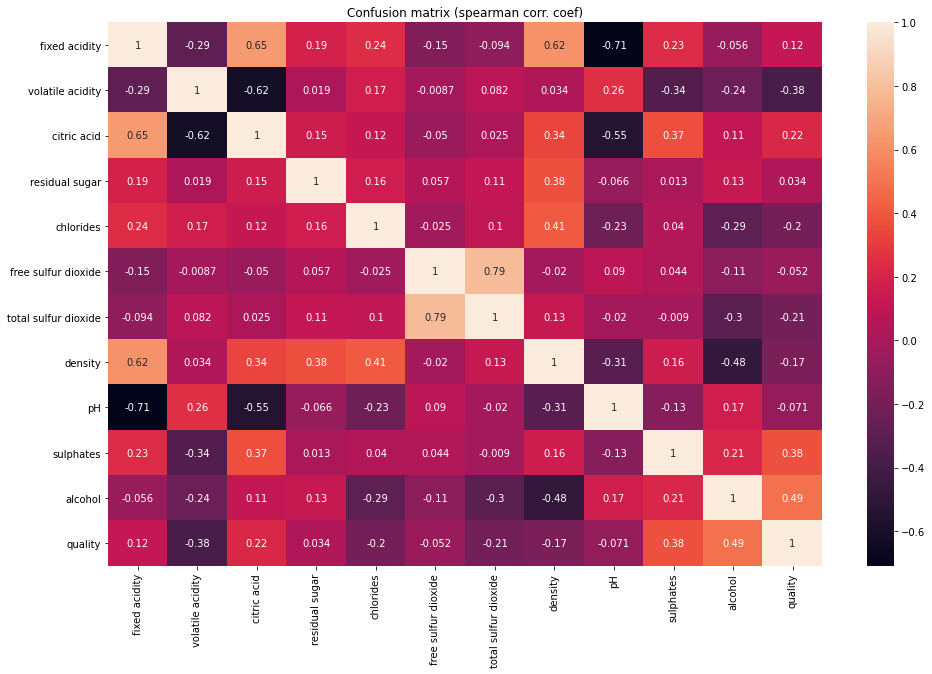

In [25]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    train.corr('spearman'),
    xticklabels=df.columns,
    yticklabels=df.columns,
    annot=True
)
plt.title('Confusion matrix (spearman corr. coef)')
plt.savefig(os.path.join(IMAGE_FOLDER, 'confusion_matrix_spearman.png'))

In [28]:
log('Confusion matices had been saved')

x_train = train[TRAIN_FEATURES]
x_test = test[TRAIN_FEATURES]
y_train = train[TARGET_FEATURE]
y_test = test[TARGET_FEATURE]

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
log('Scaling had been provided')

### Pipeline Definition

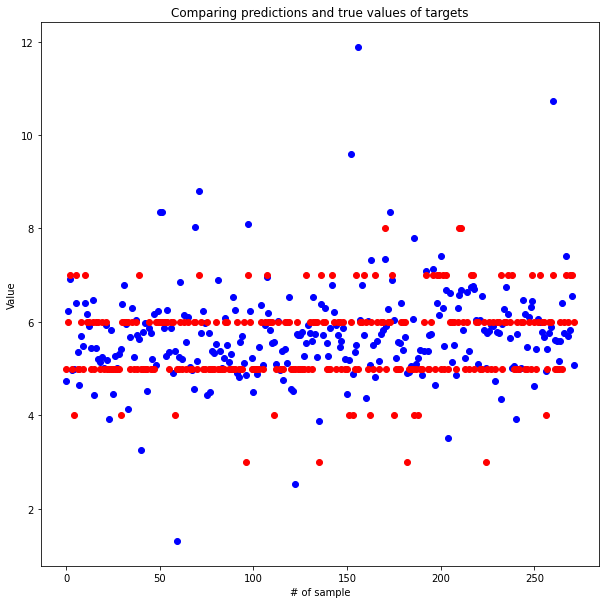

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = [1, 2, 3]

for i in range(len(degrees)):

    # Define the following object appropriately
    polynomial_features = PolynomialFeatures(degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([('PolReg', polynomial_features),('LR', linear_regression)])
    pipeline.fit(x_train, y_train)
    
    y_pred = pipeline.predict(x_test)
    y_train_pred = pipeline.predict(x_train)
    log(f'Degree {degrees[i]}: ')
    log(f'Test set error (RMSE): {mean_squared_error(y_test, y_pred, squared=False)}')
    log(f'Train set error (RMSE): {mean_squared_error(y_train, y_train_pred, squared=False)}')

    
plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(y_pred)), y_pred, color='blue', label='Predictions')
plt.scatter(np.arange(len(y_pred)), y_test, color='red', label='True samples')
plt.title('Comparing predictions and true values of targets')
plt.xlabel('# of sample')
plt.ylabel('Value')
plt.savefig(os.path.join(IMAGE_FOLDER, 'PredictionVSoriginal_plot.png'))

### AutoML - Model Training

In [35]:
import joblib

In [37]:
import autosklearn.regression
import PipelineProfiler

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [38]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=600,
    per_run_time_limit=30,
)

In [40]:
automl.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(dask_client=None,
                     delete_output_folder_after_terminate=True,
                     delete_tmp_folder_after_terminate=True,
                     disable_evaluator_output=False, ensemble_memory_limit=1024,
                     ensemble_nbest=50, ensemble_size=50,
                     exclude_estimators=None, exclude_preprocessors=None,
                     get_smac_object_callback=None, include_estimators=None,
                     include_preprocessors=None,
                     initial_configurations_via_metalearning=25,
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=3072,
                     n_jobs=None, output_folder=None, per_run_time_limit=30,
                     resampling_strategy='holdout',
                     resampling_strategy_arguments=None, seed=1,
                     smac_scenario_args=None, time_left_for_this_task=600,
                 

In [ ]:
log('Model fitted successfully')

In [41]:
joblib.dump(automl, open(os.path.join(MODEL_FOLDER, 'automl_model'), 'wb'))

In [ ]:
log('Model saved')

### Model Evaluation

In [48]:
y_pred = automl.predict(x_test)

In [49]:
import shap

In [50]:
explainer = shap.KernelExplainer(model = automl.predict, data = x_test[:50], link = "identity")


In [51]:
shap_values = explainer.shap_values(X = x_test[0:50], nsamples = 100)

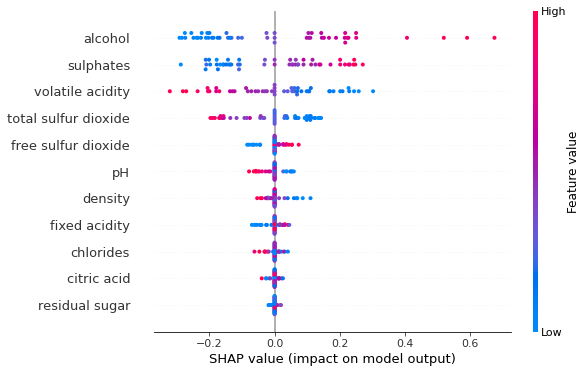

In [55]:

shap.initjs()
shap.summary_plot(shap_values = shap_values,
                  features = x_test[0:50],
                  feature_names = TRAIN_FEATURES,
                  show=False
                  )
plt.savefig(os.path.join(IMAGE_FOLDER, 'Summary_plot.png'))

log('Summary plot had been saved')